<h1 style="text-align:center;"> Cat or Dog Classifer using Keras</h1>

------------------------------------------------------------------------------------------------------------------------------

<h6>Import the required libraries</h6>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Libraries used:<br><ul><li>Keras 2.3.1</li><li>TensorFlow 1.13.2</li></ul>


------------------------------------------------------------------------------------------------------------------------------

<h6>Build and compile a classifier</h6>

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


------------------------------------------------------------------------------------------------------------------------------

<h6>Data Augmentation using ImageDataGenerator</h6>

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

------------------------------------------------------------------------------------------------------------------------------

<h6>Load and define the training and validation data</h6>

In [5]:
training_set = train_datagen.flow_from_directory('Keras/dataset/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 50, class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [6]:
valid_set = test_datagen.flow_from_directory('Keras/dataset/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 20, class_mode = 'binary')

Found 200 images belonging to 2 classes.


------------------------------------------------------------------------------------------------------------------------------

<h6>Train the CNN Classifier</h6>

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
40/40 [==============================] - 56s 1s/step - loss: 0.8495 - accuracy: 0.5120 - val_loss: 0.6867 - val_accuracy: 0.5900
Epoch 2/5
40/40 [==============================] - 52s 1s/step - loss: 0.6858 - accuracy: 0.5520 - val_loss: 0.7074 - val_accuracy: 0.5850
Epoch 3/5
40/40 [==============================] - 51s 1s/step - loss: 0.6601 - accuracy: 0.5980 - val_loss: 0.6151 - val_accuracy: 0.6750
Epoch 4/5
40/40 [==============================] - 51s 1s/step - loss: 0.6247 - accuracy: 0.6720 - val_loss: 0.5284 - val_accuracy: 0.6350
Epoch 5/5
40/40 [==============================] - 52s 1s/step - loss: 0.5925 - accuracy: 0.6800 - val_loss: 0.7051 - val_accuracy: 0.6900


------------------------------------------------------------------------------------------------------------------------------

<h6>It's time to make predictions</h6>

In [8]:
# Load the data for making predictions

prediction_set = test_datagen.flow_from_directory('Keras/dataset/prediction_set', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                            class_mode = 'binary')

Found 10 images belonging to 1 classes.


In [9]:
predictions=classifier.predict(prediction_set)

In [10]:
i=np.random.choice(len(predictions))

This image is predicted as dog


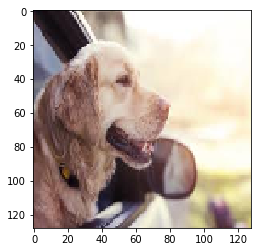

In [13]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","dog" if predictions[i] > 0.5 else "cat")

In [ ]:
# Uncomment the below code to view all the predctions

#for animal in predictions:
#    print("dog" if animal > 0.5 else "cat")